In [1]:
from IPython.display import Image

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 

Sources:

- Evan Lutins, DBSCAN: What is it? When to Use it? How to use it, https://elutins.medium.com/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818
- Jae Duk Seo, Understanding DBSCAN: A Practical Guide for Beginners with Business Applications, https://medium.com/@jdseo/understanding-dbscan-a-practical-guide-for-beginners-with-business-applications-9458792d1df8
- Nehra Vikas, DBSCAN(density based clustering). https://medium.com/@nehra.vikas95/dbscan-density-based-clustering-f8d34b79455c
- Kavya Gajjar, Cluster Analysis with DBSCAN : Density-based spatial clustering of applications with noise, https://medium.com/analytics-vidhya/cluster-analysis-with-dbscan-density-based-spatial-clustering-of-applications-with-noise-6ade1ec23555
- Dilip Valeti, DBSCAN Algorithm for Fraud Detection & Outlier Detection in a Data set, https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8


**DBSCAN** is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density:

- Divides the dataset into **n** dimensions.
- For each point in the dataset, DBSCAN forms an **n** dimensional shape around that data point.
- It then counts how many data points fall within that shape.
- DBSCAN counts this shape as a cluster. 
- DBSCAN iteratively expands the cluster:
    * It will start at a random point (in this case lets assume it was one of the red points).
    * It will count how many other points are nearby.
    * It go through each individual point within the cluster and count the number of other data points nearby.
  - DBSCAN will continue this process until no other data points are nearby, and then it will look to form a second cluster.
  - **Noise Point Detection:** DBSCAN identifies noise points that do not belong to any cluster.


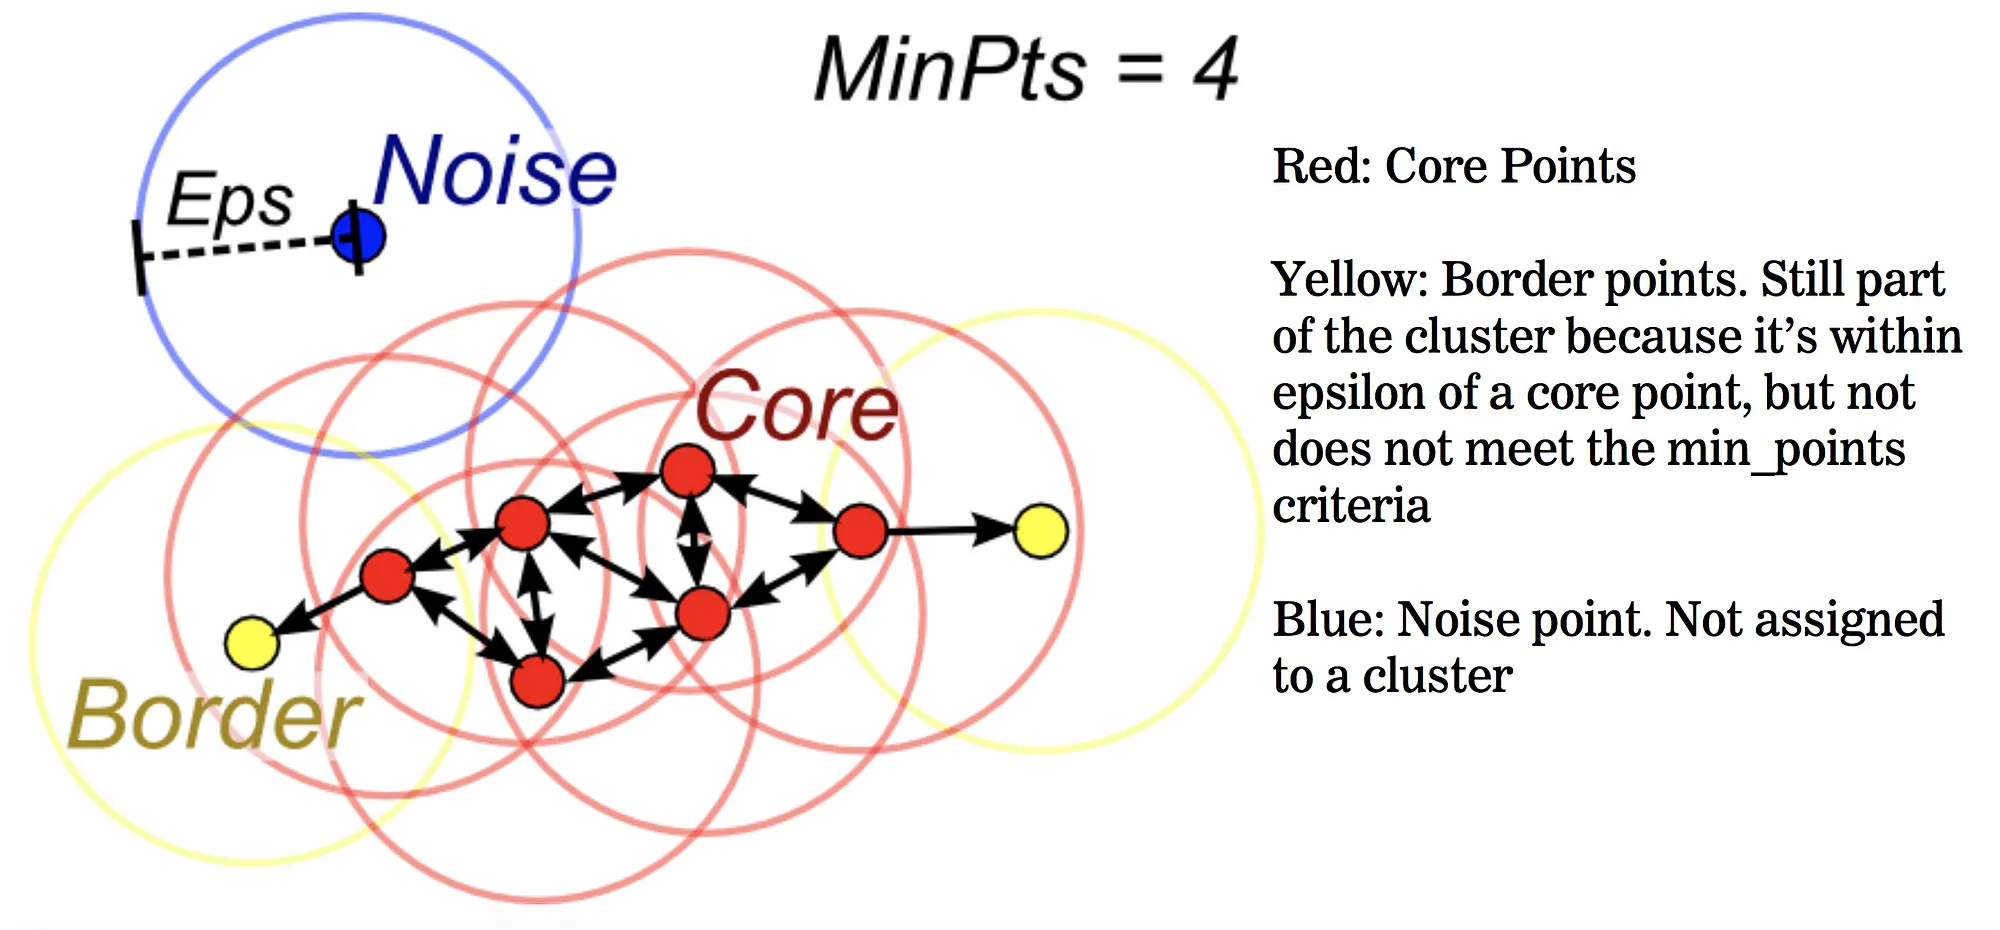

In [2]:
Image(filename="figures/dbscan1.png", width=500)

#### Advantages of DBSCAN:

- Is great at separating clusters of high density versus clusters of low density within a given dataset.

- Is great with handling outliers within the dataset.

#### Disadvantages of DBSCAN:

- Struggles with clusters of similar density.

- Struggles with high dimensionality data (if given data with too many dimensions, DBSCAN struggles).

#### Applications:

**Customer Segmentation:**
- Use DBSCAN to segment customers based on their purchasing behavior, identifying groups with similar preferences for targeted marketing campaigns.

**Anomaly Detection:**
- Apply DBSCAN to detect anomalies in network traffic data, identifying unusual patterns or behaviors that may indicate security threats.

**Geographic Clustering:**
- Use DBSCAN to cluster geographic locations based on proximity, identifying regions with similar characteristics or demographics.


### Example:

The left image depicts a more traditional clustering method that does not account for multi-dimensionality. Whereas the right image shows how DBSCAN can contort the data into different shapes and dimensions in order to find similar clusters.

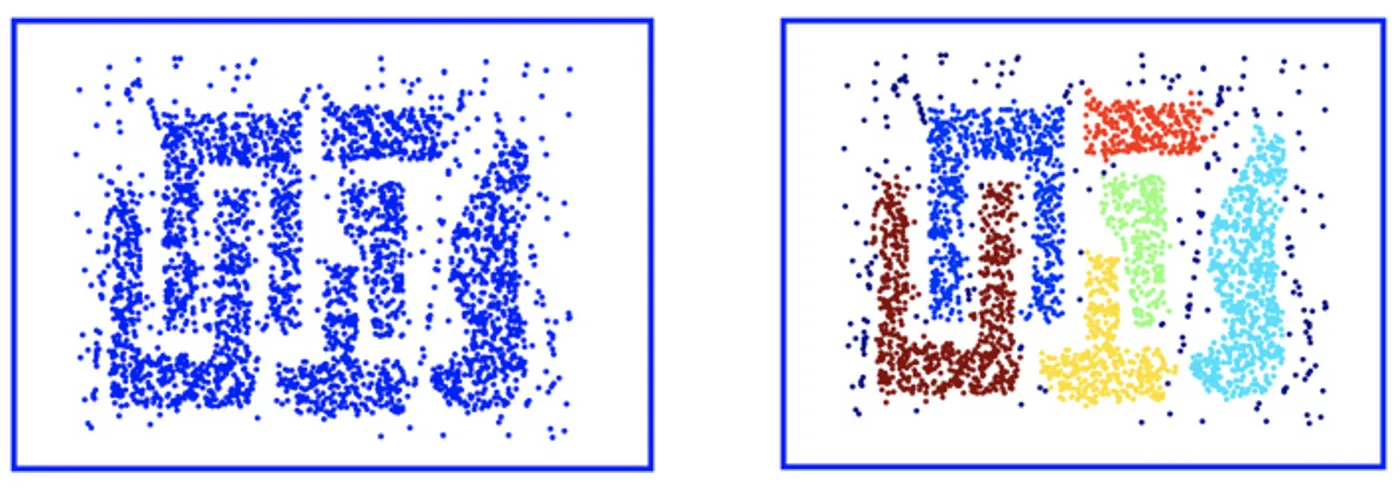

In [3]:
Image(filename="figures/dbscan2.png", width=500)

### Example: K-Means++ vs DBSCAN comparison

Source:
- https://medium.com/analytics-vidhya/cluster-analysis-with-dbscan-density-based-spatial-clustering-of-applications-with-noise-6ade1ec23555
- https://github.com/kavyagajjar/Clustering/blob/main/DBSCAN/Cluster_Analysis_with_DBSCAN.ipynb

In [4]:
import numpy as np 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 

import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

#### Circular rings dataset

In [5]:
X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

In [6]:
# Compute K-Means:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [7]:
# Compute DBSCAN:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

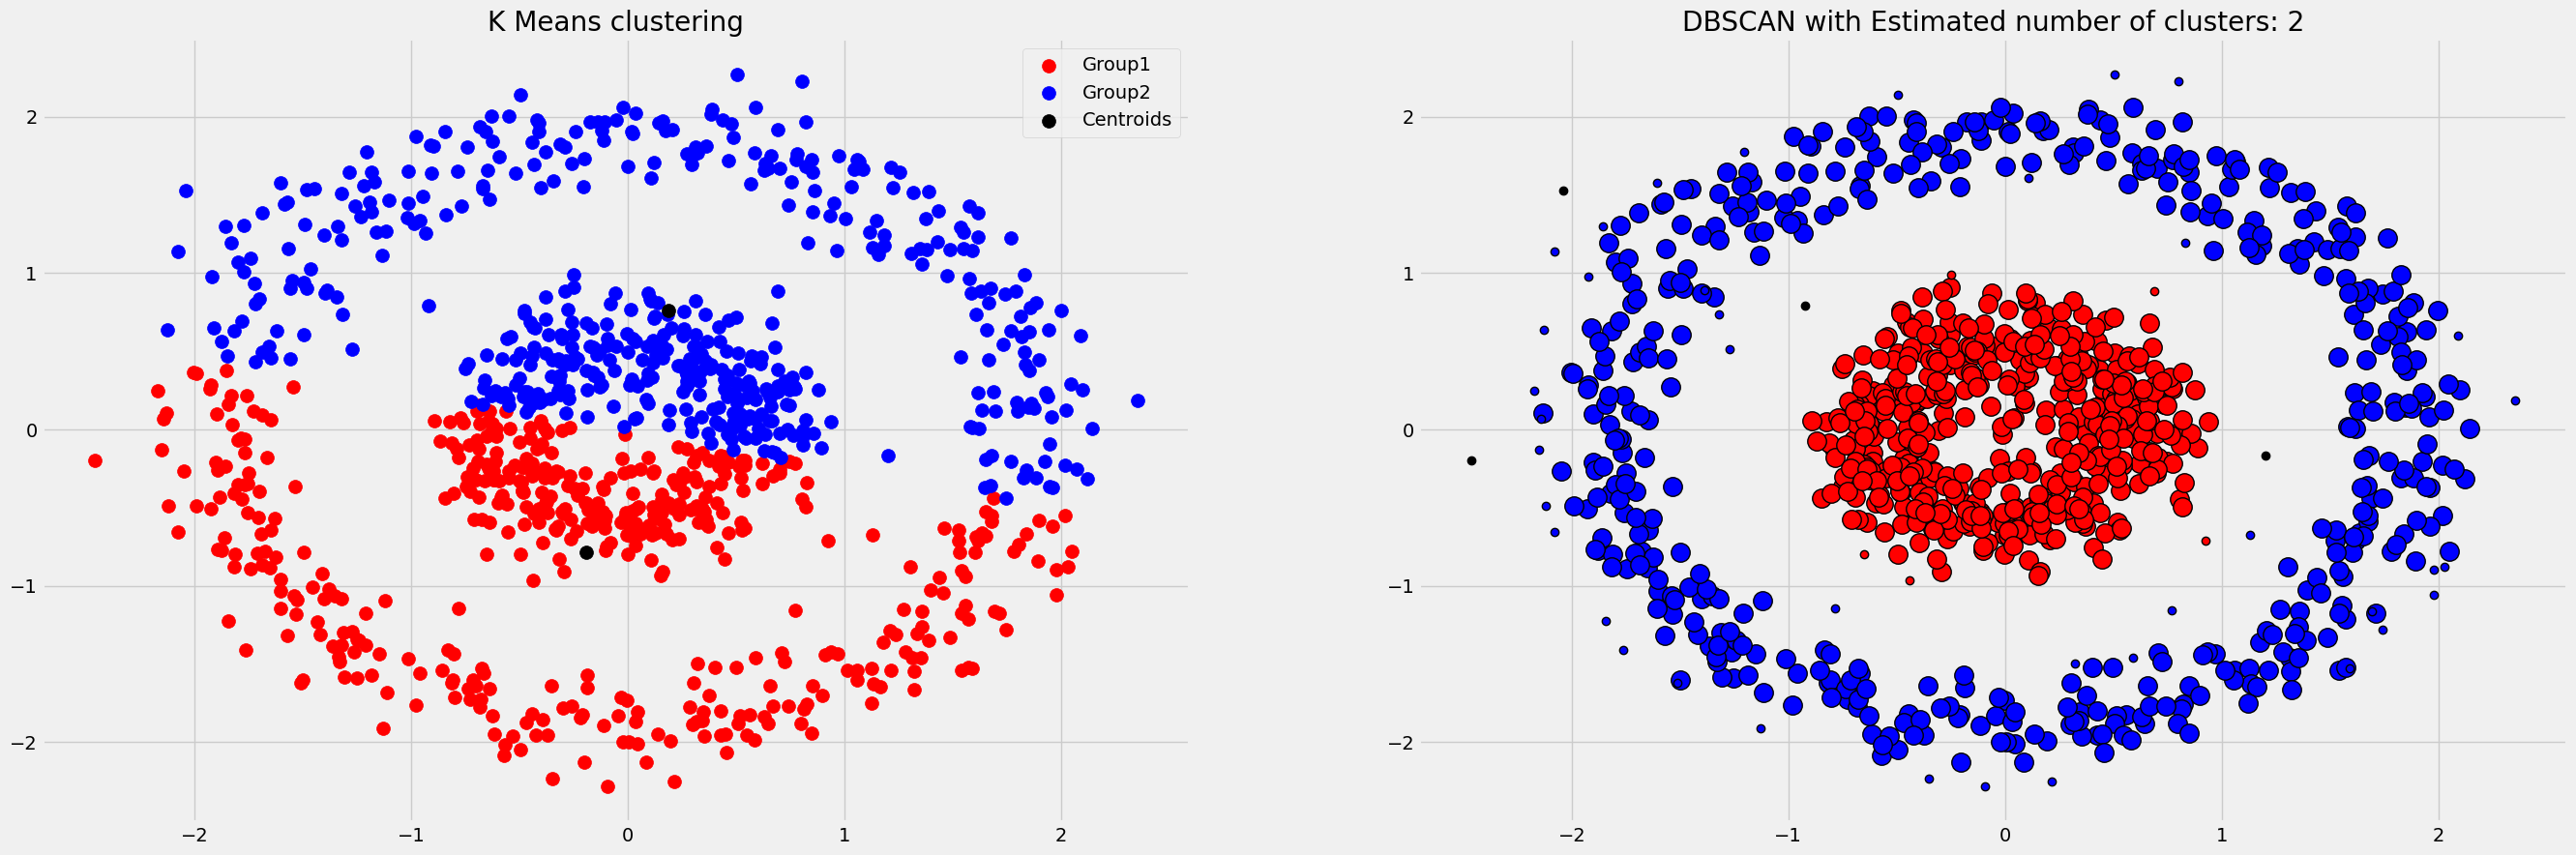

In [8]:
# Plot clustering:
fig, (ax1, ax2) = plt.subplots(ncols =2)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)

#### Half moons dataset

In [9]:
X, labels_true = make_moons(n_samples=1000, noise=0.1)
X = StandardScaler().fit_transform(X)

In [10]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [11]:
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

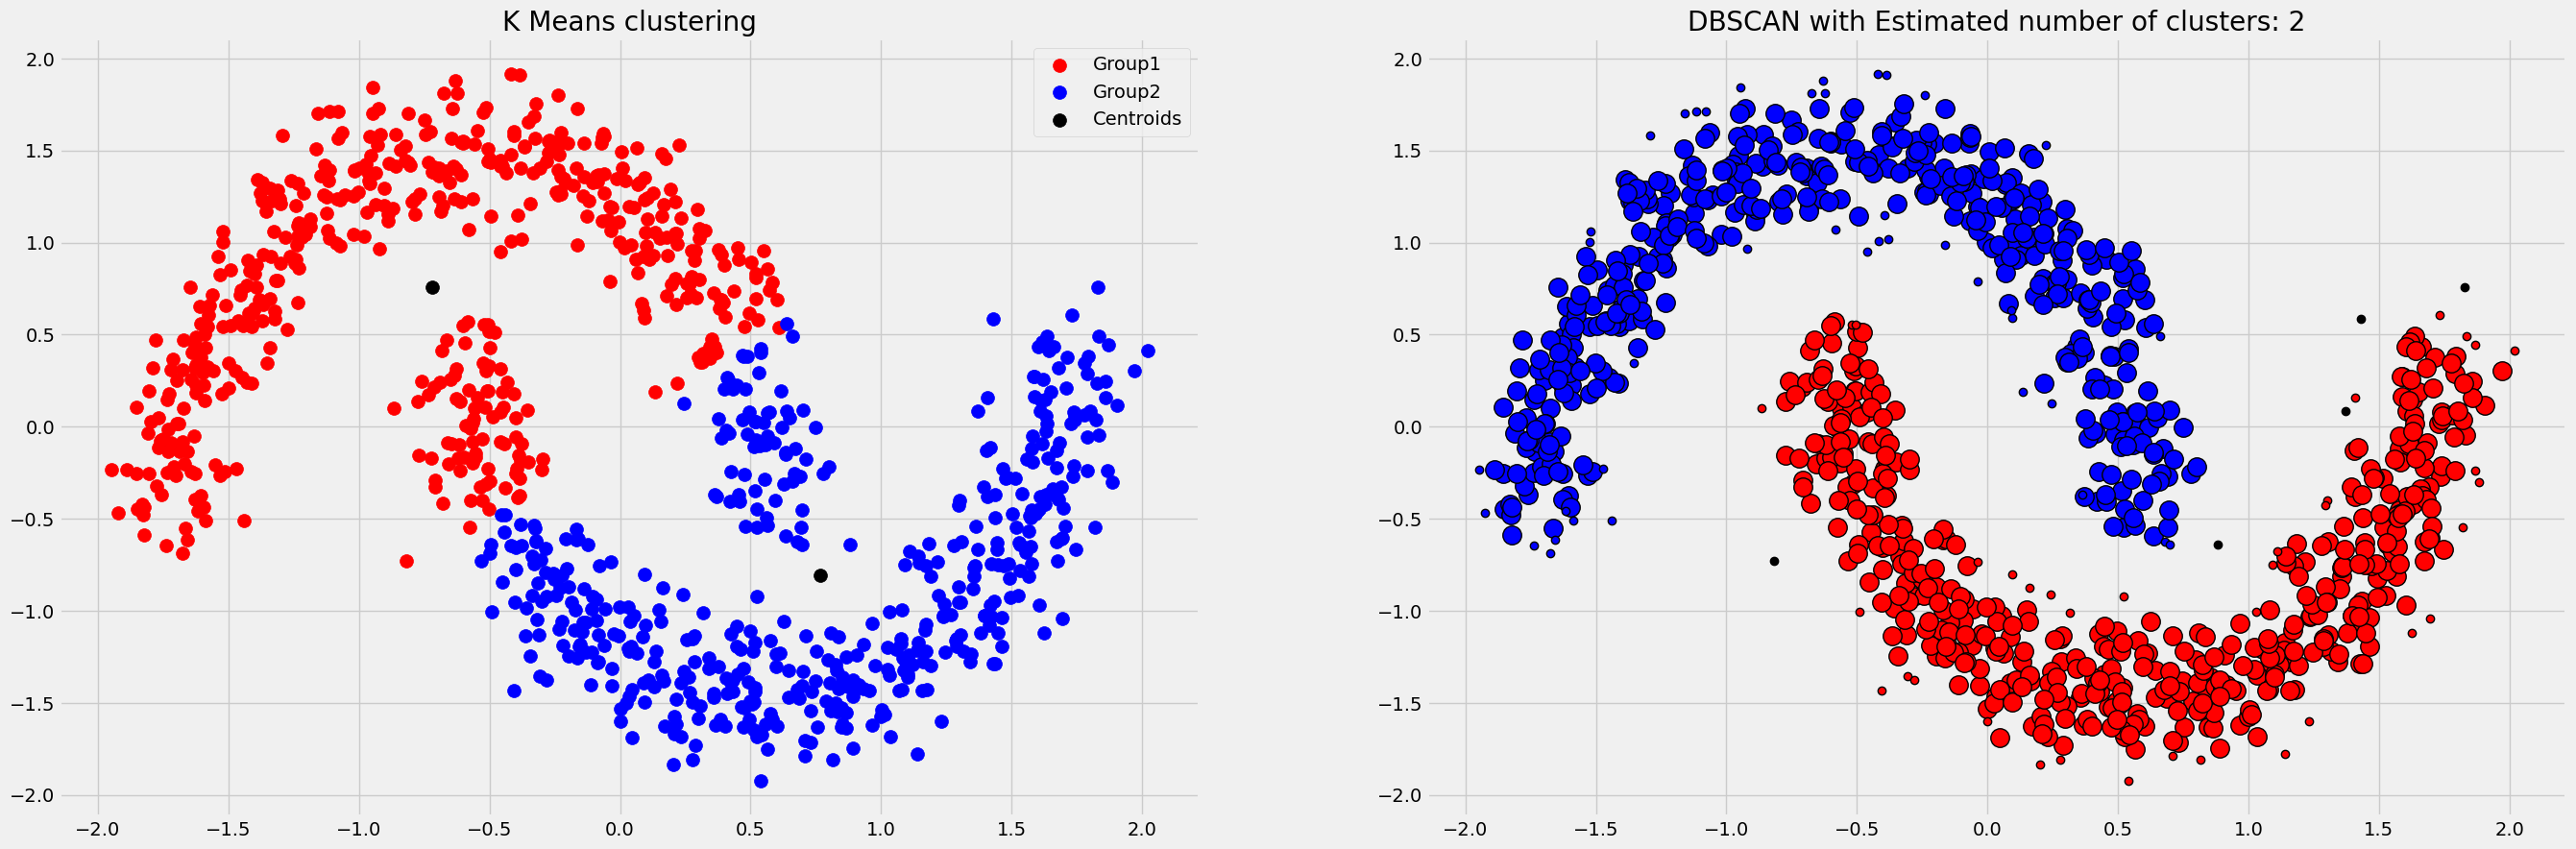

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols =2)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)